In [230]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import math
from os.path import join as pjoin

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [231]:
data_dir = './dataset'
train_file = 'train_all.csv'

## some eda

In [383]:
data = pd.read_csv(pjoin(data_dir, train_file))
def numeric(x):
        if x=='none':
            return 1
#         else:
#             return 1.5
        if x=='l1':
            return 2
        if x=='l2':
            return 3
        if x=='elasticnet':
            return 4

def numerical(data, col='penalty', func=numeric):
    data = data.copy()
    col = data[col]
    data.penalty = col.apply(func)
    return data

def fill_missing(data):
    # fill missing value with most_frequent
    imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent', verbose=0, copy=False)
    imputer.fit(data)
    data_ = imputer.transform(data)
    return data_

def eda(data):
    data = numerical(data, 'penalty')
    
    # onehot for penalty
    enc = OneHotEncoder(handle_unknown='ignore')
    o = enc.fit_transform(data['penalty'].values.reshape(-1,1)).toarray()
    o2 = pd.DataFrame(o)
    data = data.join(o2)
    data.rename(index=int, columns={0:'p0', 1:'p1', 2:'p2', 3:'p3'}, inplace=True)
    
    col_jobs = data['n_jobs']
    col_jobs[col_jobs==-1]=16#np.max(col_jobs)*2
    
    # outliers
    data = data[np.abs(data-data.mean()) <= (4*data.std())]
    data.dropna(axis=0, inplace=True)
#     data = fill_missing(data)
    data = data.reset_index(drop=True)

    # new features
    data_amount = data['n_features']*data['n_samples']*data['max_iter']
    data_amount_perr_processor = data_amount / data['n_jobs']
    data_amount_perr_processor_extend = data_amount_perr_processor * data['flip_y']
    
    data_amount_perr_processor_extend_2 = data['n_features']*data['n_samples']*data['max_iter']*np.power(10,data['flip_y'])
    
        # add new feature
    data['new_fsi'] = data['n_features']*data['n_samples']*data['max_iter'] 
#     data['new_fsi_sqrt'] = np.sqrt(data['new_fsi'])
#     data['new_fsi_lg'] = np.log10(data['new_fsi'])
#     data['new_fsi_p2'] = np.power(data['new_fsi'],2)
    
    data['new_si'] = data['n_samples']*data['max_iter']
#     data['new_si_sqrt'] = np.sqrt(data['new_si'])
#     data['new_si_lg'] = np.log10(data['new_si'])
#     data['new_si_p2'] = np.power(data['new_si'],2)
    
#     data['new_fs'] = data['n_samples']*data['n_samples']
#     data['new_fs_sqrt'] = np.sqrt(data['new_fs']) 
#     data['new_fs_lg'] = np.log10(data['new_fs'])
#     data['new_fs_p2'] = np.power(data['new_fs'],2)
    
#     data['new_fi'] = data['n_features']*data['max_iter']
#     data['new_fi_sqrt'] = np.sqrt(data['new_fi']) 
#     data['new_fi_lg'] = np.log10(data['new_fi'])
#     data['new_fi_p2'] = np.power(data['new_fi'],2)

#     data['njob_sqrt'] = np.sqrt(data['n_jobs'])
#     data['njob_lg'] = np.log10(data['n_jobs'])
#     data['njob_p2'] = np.power(data['n_jobs'],2)

#     data['f_sqrt'] = np.sqrt(data['n_features'])
#     data['f_lg'] = np.log10(data['n_features'])
#     data['f_p2'] = np.power(data['n_features'], 2)
    
#     data['s_sqrt'] = np.sqrt(data['n_samples'])
#     data['s_lg'] = np.log10(data['n_samples'])
#     data['s_p2'] = np.power(data['n_samples'], 2)
    
#     data['i_sqrt'] = np.sqrt(data['max_iter'])
#     data['i_lg'] = np.log10(data['max_iter'])
#     data['i_p2'] = np.power(data['max_iter'], 2)
    
    data['fsi_j'] = data['new_fsi'] / data['n_jobs']
#     data['fs_j'] = data['new_fs'] / data['n_jobs']
#     data['fi_j'] = data['new_fi'] / data['n_jobs']
#     data['si_j'] = data['new_si'] / data['n_jobs']
    
#     data['si_j_sqrt'] = np.sqrt(data['si_j'])
#     data['si_j_lg'] = np.log10(data['si_j'])
#     data['si_j_p2'] = np.power(data['si_j'], 2)
    
    data['f_j'] = data['n_features'] / data['n_jobs']
#     data['f_j_sqrt'] = np.sqrt(data['f_j'])
#     data['f_j_lg'] = np.log10(data['f_j'])
#     data['f_j_p2'] = np.power(data['f_j'], 2)
    
    data['s_j'] = data['n_samples'] / data['n_jobs']
#     data['s_j_sqrt'] = np.sqrt(data['si_j'])
#     data['s_j_lg'] = np.log10(data['si_j'])
#     data['s_j_p2'] = np.power(data['si_j'], 2)
    
    data['i_j'] = data['max_iter'] / data['n_jobs']
#     data['i_j_sqrt'] = np.sqrt(data['i_j'])
#     data['i_j_lg'] = np.log10(data['i_j'])
#     data['i_j_p2'] = np.power(data['i_j'], 2)
    
#     data['p_fsi'] = data['penalty'] * data['new_fsi']
#     data['p_fsi_sqrt'] = np.sqrt(data['p_fsi'])
#     data['p_fsi_lg'] = np.log10(data['p_fsi'])
#     data['p_fsi_p2'] = np.power(data['p_fsi'], 2)

#     data['p0_si'] = data['p0'] / np.log2(data['new_si'])
    data['p1_si'] = data['p1'] * data['new_si']
#     data['p2_si'] = data['p2'] / np.log2(data['new_si'])
    data['p3_si'] = data['p3'] * data['new_si']
    
#     data['s_c'] = data['n_samples'] * data['n_classes']
    data['f_c'] = data['n_features'] * data['n_classes']
    data['i_c'] = data['max_iter'] * data['n_classes']
    
    data['p3_i_c'] = data['p3'] * data['i_c']
    
#     data['p0_fsij'] = data['p0'] / np.log2(data['fsi_j'])
#     data['p1_fsij'] = data['p1'] * data['fsi_j']
#     data['p2_fsij'] = data['p2'] / np.log2(data['fsi_j'])
#     data['p3_fsij'] = data['p3'] * data['fsi_j']
    
#     data['p0_clz'] = -1 * data['n_classes']
#     data['p1_clz'] = data['p1'] * data['n_classes']
#     data['p2_clz'] = -1 * data['n_classes']
#     data['p3_clz'] = data['p3'] * data['n_classes']
    
#     data['p0_f'] = -1 * data['n_features']
#     data['p1_f'] = data['p1'] * data['n_features']
#     data['p2_f'] = -1 * data['n_features']
#     data['p3_f'] = data['p3'] * data['n_features']
    
#     data['p0_a'] = data['p0'] * data['alpha']
#     data['p1_a'] = data['p1'] * data['alpha']
#     data['p2_a'] = data['p2'] * data['alpha']
#     data['p3_a'] = data['p3'] * data['alpha']
    
#     data['p0_r'] = data['p0'] * data['l1_ratio']
#     data['p1_r'] = data['p1'] * data['l1_ratio']
#     data['p2_r'] = data['p2'] * data['l1_ratio']
#     data['p3_r'] = data['p3'] * data['l1_ratio']
    
#     data['f_nc_if_sc_a'] = data['flip_y'] * data['n_classes'] * data['n_informative'] * data['scale'] * data['alpha']
#     data['f_nc_if_sc_a_sqrt'] = np.sqrt(data['f_nc_if_sc_a'])
#     data['f_nc_if_sc_a_lg'] = np.log10(data['f_nc_if_sc_a'])
#     data['f_nc_if_sc_a_p2'] = np.power(data['f_nc_if_sc_a'], 2)

    return data

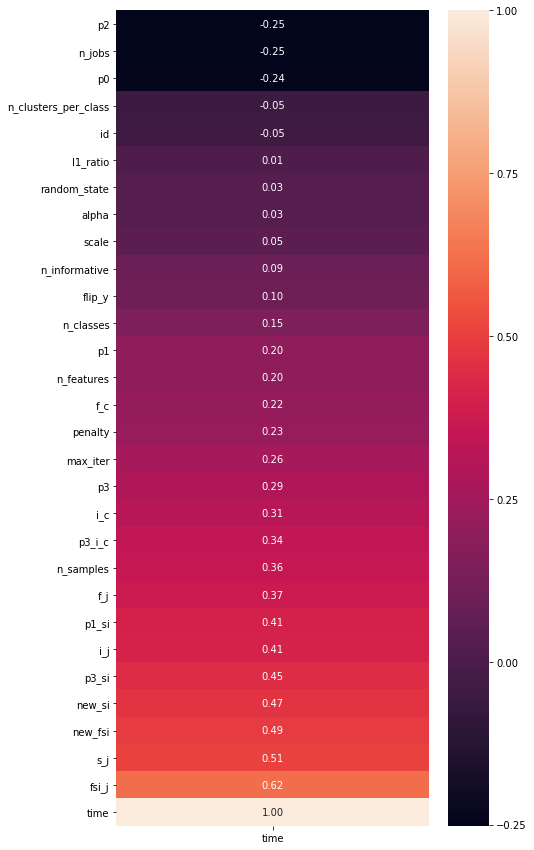

In [384]:
data = pd.read_csv(pjoin(data_dir, train_file))
data = eda(data)
# data.keys()
corr = data.corr()
corr = corr[['time']]
fig = plt.figure(figsize=(7,15))
sns.heatmap(corr.sort_values(by='time', ascending=True), annot=True, fmt='.2f')
plt.show()

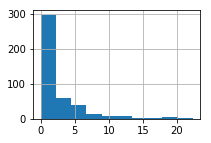

In [310]:
data['time'].hist(figsize=(3, 2))

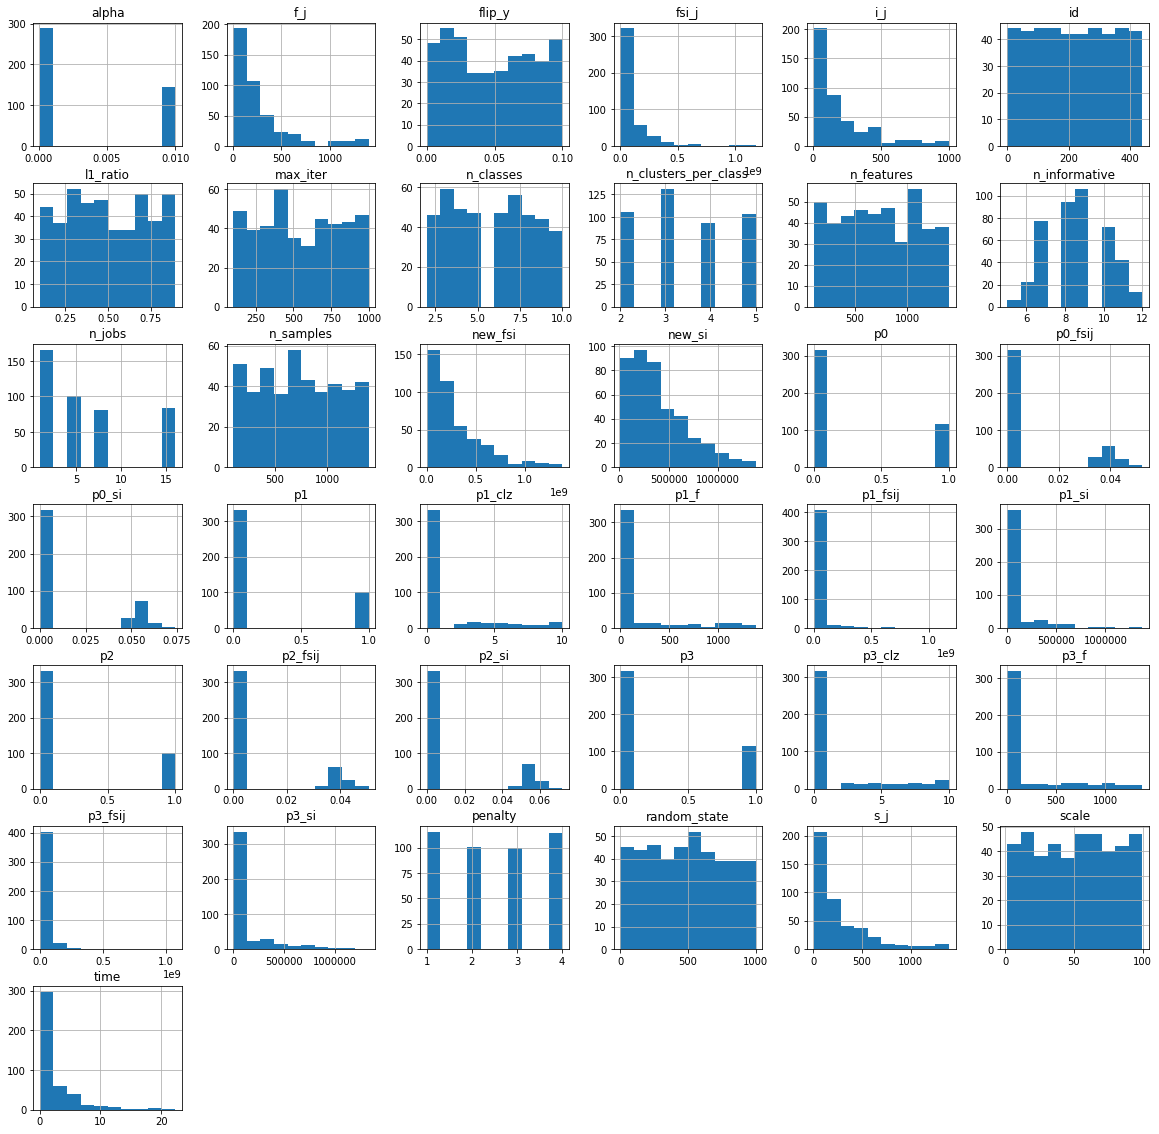

In [247]:
data.hist(figsize=(20, 20))
plt.show()

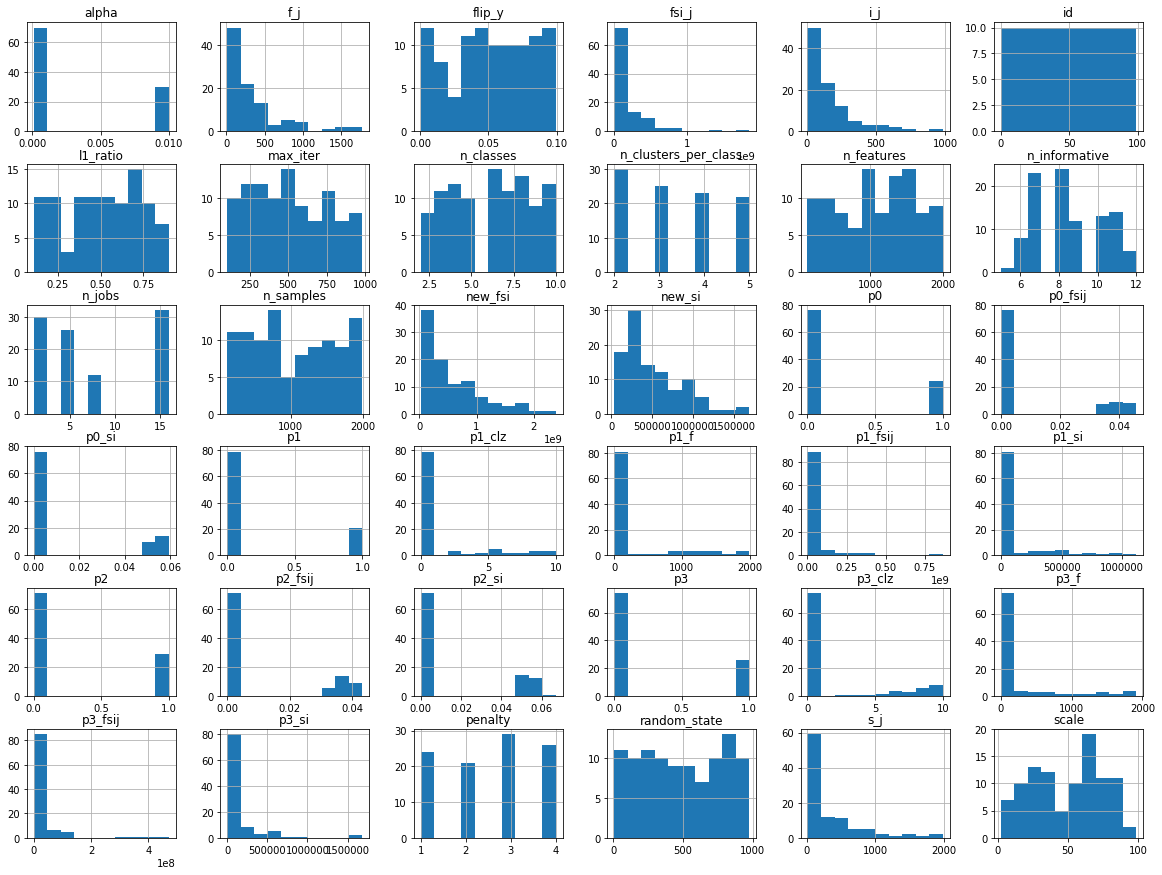

In [246]:
data_test = pd.read_csv(pjoin(data_dir, 'test.csv'))
data_test = eda(data_test)
data_test.hist(figsize=(20, 15))
plt.show()

# modeling attempt

## some eda

In [111]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error

def train_and_cross_vali(model_name, model, X, y, verbose=1):
    scores = cross_val_score(model, 
                             X, 
                             y, 
                             cv=100, 
                             n_jobs=2, 
                             scoring=make_scorer(mean_squared_error))#mean_absolute_error))#
    score = scores.mean()
    if verbose > 0:
        print(f"{model_name} crossvali score: {score}")
    return score
    
def train_and_score(model_name, model, X_train, X_test, y_train, y_test, verbose=1):
    model = model.fit(X=X_train, y=y_train)
    score = 'NaN'
    if len(X_test) > 0:
        score = model.score(X_test, y_test)
    if verbose > 0:
        print(f"{model_name} fit score: {score}")
    return score


## adaboost

In [344]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

In [346]:
data = pd.read_csv(pjoin(data_dir, train_file))
data = eda(data)
corr = data.corr()
keys = corr.query('abs(time) > 0.15').index.tolist()
keys.remove('time')
keys.remove('penalty')

x_data = data[keys]
y_data = data['time']
n_est = 10
# x_data_train = fill_missing(data)

In [ ]:
min_err = 100
min_r = 0
base_e = RandomForestRegressor(n_estimators=10, criterion='mse', max_features=3, n_jobs=8, random_state=50011)
for x in range(10):
    r = 2 + x/10
    model = AdaBoostRegressor(base_estimator=base_e, n_estimators=n_est, loss='square', learning_rate=r, random_state=5001)
    err = train_and_cross_vali('adaboost reg', model, x_data, y_data, verbose=0)
    if err < min_err:
        min_err = err
        min_r = r
print(f"min-err: {min_err} @ r: {min_r}")

In [349]:
min_r = 2

In [352]:
# base_e = RandomForestRegressor(n_estimators=10, criterion='mse', max_features=3, n_jobs=8, random_state=50011)
model = AdaBoostRegressor(n_estimators=n_est, loss='square', learning_rate=min_r, random_state=5001)
train_and_cross_vali('AdaBoost', model, x_data, y_data)

AdaBoost crossvali score: 8.639191351566073


8.639191351566073

#### retrain the model

In [ ]:
model = AdaBoostRegressor(n_estimators=n_est, loss='square', learning_rate=min_r, random_state=5001)
model.fit(X=x_data, y=y_data)

In [ ]:
# feature importance
features = np.array(keys)#.reshape(-1,1)
importance = np.array([str(x) for x in model.feature_importances_.tolist()])#.reshape(-1,1)
feature_importance_list = []
for x, y in zip(features, importance):
    feature_importance_list.append((x, y))

feature_importance_list.sort(key=lambda x:x[1], reverse=True)
for x, y in feature_importance_list:
    print(f"{x}: {y}")

#### predict & output

In [1003]:
data_test = pd.read_csv('./dataset/test.csv')
data_test = eda(data_test)
data_test = data_test[keys]
# data_test = fill_missing(data_test)

In [1004]:
y_predicted = model.predict(X=data_test)
f_name = 'submission_boost.csv'
# f_name = './Submission.csv'
with open(f_name, 'w') as f:
    f.write("Id,time"+ '\n')
    for index, x in enumerate(y_predicted.tolist()):
        f.write(f"{index},{str(x)}" + '\n')
#         f.write(f"{index},{'{:.2f}'.format(x)}" + '\n')

## Random Forest

In [366]:
from sklearn.ensemble import RandomForestRegressor

In [367]:
data.corr().query('abs(time) > 0.15').index.tolist()

['penalty',
 'max_iter',
 'n_jobs',
 'n_samples',
 'n_features',
 'time',
 'p0',
 'p1',
 'p2',
 'p3',
 'new_fsi',
 'new_si',
 'fsi_j',
 'f_j',
 's_j',
 'i_j',
 'p1_si',
 'p3_si',
 'f_c',
 'i_c',
 'p3_i_c']

In [368]:
data = pd.read_csv(pjoin(data_dir, train_file))
data = eda(data)
corr = data.corr()

keys = corr.query('abs(time) > 0.15').index.tolist()
keys.remove('time')
# keys.remove('penalty')
# keys.remove('alpha')
# keys.remove('scale')

# keys = ['penalty',
#         'n_classes', 
#         'flip_y', 
#         'new_fs',
#         'njob_lg']

print(keys)
x_data = data[keys]
y_data = data['time']
n_est = 1000
# x_data_train = fill_missing(data)

['penalty', 'max_iter', 'n_jobs', 'n_samples', 'n_features', 'p0', 'p1', 'p2', 'p3', 'new_fsi', 'new_si', 'fsi_j', 'f_j', 's_j', 'i_j', 'p1_si', 'p3_si', 'f_c', 'i_c', 'p3_i_c']


In [369]:
def find_param():
    min_err = 100
    min_f = 0
    x_plt = []
    err_plt = []
    for x in range(100):
        f = (x+1)*10
        model = RandomForestRegressor(n_estimators=f, 
                                      criterion='mse', 
                                      max_features=8,#len(keys), 
                                      n_jobs=8, 
                                      random_state=5001)
        err = train_and_cross_vali('knn reg', model, x_data, y_data, verbose=0)
        x_plt.append(f)
        err_plt.append(err)
        if err < min_err:
            min_err = err
            min_f = f
    print(f"min-err: {min_err} @ feature_count: {min_f}")
    
    plt.plot(err_plt)
    plt.title('param-error search')
    plt.show()

In [370]:
# find_param()

In [371]:
min_f = len(keys)
n_est=420

In [372]:
model = RandomForestRegressor(n_estimators=n_est, criterion='mse', max_features=min_f, n_jobs=8, random_state=5001)
train_and_cross_vali('random_forest reg', model, x_data, y_data, verbose=1)

random_forest reg crossvali score: 1.9373741778442508


1.9373741778442508

#### Retain the model

In [373]:
model = RandomForestRegressor(n_estimators=n_est, criterion='mse', max_features=min_f, n_jobs=8, random_state=5001)
model.fit(X=x_data, y=y_data)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=20, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=420, n_jobs=8, oob_score=False, random_state=5001,
           verbose=0, warm_start=False)

In [374]:
# feature importance
features = np.array(keys)#.reshape(-1,1)
importance = np.array([str(x) for x in model.feature_importances_.tolist()])#.reshape(-1,1)
feature_importance_list = []
for x, y in zip(features, importance):
    feature_importance_list.append((x, y))

feature_importance_list.sort(key=lambda x:x[1], reverse=True)
for x, y in feature_importance_list:
    print(f"{x}: {y}")

fsi_j: 0.3809843936803163
p1_si: 0.15204751339545855
p3_i_c: 0.13617712486621125
p3_si: 0.06793220128141235
i_c: 0.046194560045025465
f_c: 0.04118324730552314
new_fsi: 0.030776203148297186
s_j: 0.023323743971945872
i_j: 0.021263341393537635
max_iter: 0.020071946087436836
n_samples: 0.0186458721249197
f_j: 0.014460777351344715
new_si: 0.012038010494057434
n_features: 0.01062552938911835
p1: 0.007147914144193131
penalty: 0.006142160984598452
p2: 0.004301273781657609
p0: 0.0029253828190936803
p3: 0.0024454981840430533
n_jobs: 0.001313305551809474


#### make prediction

In [375]:
data_test = pd.read_csv('./dataset/test.csv')
data_test = eda(data_test)
data_test = data_test[keys]
# data_test = fill_missing(data_test)

In [376]:
y_predicted = model.predict(X=data_test)
f_name = 'submission.csv'
# f_name = './Submission.csv'
with open(f_name, 'w') as f:
    f.write("Id,time"+ '\n')
    for index, x in enumerate(y_predicted.tolist()):
        f.write(f"{index},{str(x)}" + '\n')
#         f.write(f"{index},{'{:.2f}'.format(x)}" + '\n')

## linear

In [385]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import normalize, scale, StandardScaler

In [386]:
data = pd.read_csv(pjoin(data_dir, train_file))
data = eda(data)
corr = data.corr()

keys = corr.query('abs(time) > 0.15').index.tolist()
keys.remove('time')
keys.remove('penalty')
# keys.remove('alpha')

# keys=['scale_lg', 'new_fs_p2']
print(keys)
x_data = data[keys]
y_data = data['time']

# x_data = StandardScaler().fit_transform(x_data)
# PCA
# from sklearn.decomposition import PCA
# pca = PCA(n_components=5)
# x_data = pca.fit_transform(x_data)

['max_iter', 'n_jobs', 'n_samples', 'n_features', 'p0', 'p1', 'p2', 'p3', 'new_fsi', 'new_si', 'fsi_j', 'f_j', 's_j', 'i_j', 'p1_si', 'p3_si', 'f_c', 'i_c', 'p3_i_c']


In [387]:
def find_param_2():
    min_err = 100
    min_alpha = 0
    for x in range(100):
        alpha = x/100
        clf = Lasso(alpha=alpha)
        err = train_and_cross_vali('linear', clf, x_data, y_data, verbose=0)
        if err < min_err:
            min_err = err
            min_alpha = alpha
    print(f"min-err: {min_err} @ alpha: {min_alpha}")

In [388]:
model = Lasso(alpha=0.03)
err = train_and_cross_vali('linear', model, x_data, y_data, verbose=1)

linear crossvali score: 3.298518701299898


In [363]:
model.fit(X=x_data, y=y_data)

Lasso(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [364]:
# model.coef_

In [365]:
for k, coef in zip(keys, model.coef_):
    print(f"{k}: {coef}")

max_iter: -0.0014396834311019371
n_jobs: -0.021238036934387538
n_samples: 0.00029133364930070767
n_features: 0.00011443151736642206
p0: -0.0
p1: 0.0
p2: -0.015093393028234689
p3: 0.0
new_fsi: 1.7513694065486077e-09
new_si: -2.612991459669859e-06
fsi_j: 7.759116613730099e-09
f_j: -0.0003697936859297789
s_j: 0.0021546327349456027
i_j: 7.96405515581653e-05
p1_si: 7.007109838506237e-06
p3_si: 6.429014588053621e-06
f_c: 0.00012371484709058922
i_c: 0.0003704240725006773
p3_i_c: 0.00017563450167480308


#### make prediction

In [340]:
data_test = pd.read_csv('./dataset/test.csv')
data_test = eda(data_test)
data_test = data_test[keys]
# data_test = StandardScaler().fit_transform(data_test)

In [341]:
y_predicted = model.predict(X=data_test)

In [342]:
y_predicted.min()

-1.9213810027973934

In [343]:
f_name = 'submission_lasso.csv'
# f_name = './Submission.csv'
with open(f_name, 'w') as f:
    f.write("Id,time"+ '\n')
    for index, x in enumerate(y_predicted.tolist()):
        if x<0:
            x=0
        f.write(f"{index},{str(x)}" + '\n')